<a href="https://colab.research.google.com/github/khoslaritwek/Python_Projects/blob/master/housePricingKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from google.colab import files

In [ ]:
files.upload()

In [ ]:
## Loading data into data frame
trainDataFrame = pd.read_csv('train.csv')
testDataFrame = pd.read_csv('test.csv')

In [ ]:
trainDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
testDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
## Removing following features from test and train frame 
## MiscFeature
## Fence
## PoolQC
## FireplaceQu
## Alley
trainDataFrame = trainDataFrame.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis = 1)
testDataFrame = testDataFrame.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'] , axis = 1)


In [ ]:
## replacing Nan features with suitable substitues for train and testFrame
## same code block was for each features here it self
#trainDataFrame['MasVnrType'] = trainDataFrame['MasVnrType'].fillna('Nap')
testDataFrame['MSZoning'] = testDataFrame['MSZoning'].fillna('Nap')

In [ ]:
## A sperate piece of code to handle float values, these are to replaced by the mean in training set
trainDataFrame['LotFrontage'] = trainDataFrame['LotFrontage'].fillna(trainDataFrame['LotFrontage'].median())
testDataFrame['LotFrontage'] = testDataFrame['LotFrontage'].fillna(trainDataFrame['LotFrontage'].median())

In [ ]:
## applying certain feature transformations to test data which where to needed with train data 
testDataFrame['BsmtHalfBath'] = testDataFrame['BsmtHalfBath'].fillna(trainDataFrame['BsmtHalfBath'].median())

In [ ]:
## lets save progress till now
testDataFrame.to_csv('test_frameIm.csv')
trainDataFrame.to_csv('train_frameIm.csv')

In [ ]:
## now describing a feature mapping function  
def mapper(param):
  uparam = set(trainDataFrame[param])
  ## something not worthy here adding 'Nap' in set  since its a set i a set already contains Nap nothing is affected
  uparam.add('Nap')
  mparam = {}
  ii = 0
  for mem in uparam:
    mparam[mem] = ii
    ii = ii + 1
  
  trainDataFrame[param] = trainDataFrame[param].map(mparam)
  testDataFrame[param] = testDataFrame[param].map(mparam)
  print (mparam)

In [ ]:
mapper('MSZoning')

In [ ]:
# since the data is now processed lets save this againg
testDataFrame.to_csv('Ptest.csv')
trainDataFrame.to_csv('Ptrain.csv')

In [ ]:
trainDataFrame.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,0,0,4,1,0,2,4,5,4,0,2,7,5,2003,2003,5,1,14,16,1,196.0,4,2,4,4,2,3,0,706,4,0,150,856,4,4,1,2,856,854,0,1710,1,0,2,1,3,1,4,8,4,0,6,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,2008,5,0,208500
1,2,20,4,80.0,9600,0,0,4,1,2,2,23,6,4,0,8,6,8,1976,1976,5,1,8,11,3,0.0,1,2,2,4,2,4,1,978,4,0,284,1262,4,4,1,2,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,6,1976.0,2,2,460,2,2,2,298,0,0,0,0,0,0,5,2007,5,0,181500
2,3,60,4,68.0,11250,0,1,4,1,0,2,4,5,4,0,2,7,5,2001,2002,5,1,14,16,1,162.0,4,2,4,4,2,0,0,486,4,0,434,920,4,4,1,2,920,866,0,1786,1,0,2,1,3,1,4,6,4,1,6,2001.0,2,2,608,2,2,2,0,42,0,0,0,0,0,9,2008,5,0,223500
3,4,70,4,60.0,9550,0,1,4,1,5,2,19,5,4,0,2,7,5,1915,1970,5,1,9,7,3,0.0,1,2,5,1,4,3,1,216,4,0,540,756,4,5,1,2,961,756,0,1717,1,0,1,0,3,1,4,7,4,1,0,1998.0,0,3,642,2,2,2,0,35,272,0,0,0,0,2,2006,5,2,140000
4,5,60,4,84.0,14260,0,1,4,1,2,2,14,5,4,0,2,8,5,2000,2000,5,1,14,16,1,350.0,4,2,4,4,2,2,0,655,4,0,490,1145,4,4,1,2,1145,1053,0,2198,1,0,2,1,4,1,4,9,4,1,6,2000.0,2,3,836,2,2,2,192,84,0,0,0,0,0,12,2008,5,0,250000
5,6,50,4,85.0,14115,0,1,4,1,0,2,10,5,4,0,5,5,5,1993,1995,5,1,14,16,3,0.0,1,2,0,4,2,3,0,732,4,0,64,796,4,4,1,2,796,566,0,1362,1,0,1,1,1,1,1,5,4,0,6,1993.0,0,2,480,2,2,2,40,30,0,320,0,0,700,10,2009,5,0,143000
6,7,20,4,75.0,10084,0,0,4,1,0,2,1,5,4,0,8,8,5,2004,2005,5,1,14,16,4,186.0,4,2,4,3,2,2,0,1369,4,0,317,1686,4,4,1,2,1694,0,0,1694,1,0,2,0,3,1,4,7,4,1,6,2004.0,2,2,636,2,2,2,255,57,0,0,0,0,0,8,2007,5,0,307000
7,8,60,4,69.0,10382,0,1,4,1,5,2,5,8,4,0,2,7,6,1973,1973,5,1,2,3,4,240.0,1,2,2,4,2,0,1,859,2,32,216,1107,4,4,1,2,1107,983,0,2090,1,0,2,1,3,1,1,7,4,2,6,1973.0,2,2,484,2,2,2,235,204,228,0,0,0,350,11,2009,5,0,200000
8,9,50,2,51.0,6120,0,0,4,1,0,2,15,7,4,0,5,7,5,1931,1950,5,1,1,7,3,0.0,1,2,5,1,2,3,4,0,4,0,952,952,4,5,1,5,1022,752,0,1774,0,0,2,0,2,2,1,8,6,2,0,1931.0,0,2,468,3,2,2,90,0,205,0,0,0,0,4,2008,5,2,129900
9,10,190,4,50.0,7420,0,0,4,1,5,2,24,7,5,4,0,5,6,1939,1950,5,1,8,11,3,0.0,1,2,5,1,2,3,0,851,4,0,140,991,4,4,1,2,1077,0,0,1077,1,0,1,0,2,2,1,5,4,2,6,1939.0,2,1,205,5,2,2,0,4,0,0,0,0,0,1,2008,5,0,118000


In [ ]:
testDataFrame.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,5,80.0,11622,0,0,4,1,0,2,6,6,4,0,8,5,6,1961,1961,5,1,14,16,3,0.0,1,2,2,1,2,3,6,468.0,5,144.0,270.0,882.0,4,2,1,2,896,0,0,896,0.0,0.0,1,0,2,1,1,5,4,0,6,1961.0,0,1.0,730.0,2,2,2,140,0,0,0,120,0,0,6,2010,5,0
1,1462,20,4,81.0,14267,0,1,4,1,5,2,6,5,4,0,8,6,6,1958,1958,2,1,9,12,1,108.0,1,2,2,1,2,3,1,923.0,4,0.0,406.0,1329.0,4,2,1,2,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,4,0,6,1958.0,0,1.0,312.0,2,2,2,393,36,0,0,0,0,12500,6,2010,5,0
2,1463,60,4,74.0,13830,0,1,4,1,0,2,3,5,4,0,2,5,5,1997,1998,5,1,14,16,3,0.0,1,2,4,4,2,3,0,791.0,4,0.0,137.0,928.0,4,5,1,2,928,701,0,1629,0.0,0.0,2,1,3,1,1,6,4,1,6,1997.0,1,2.0,482.0,2,2,2,212,34,0,0,0,0,0,3,2010,5,0
3,1464,60,4,78.0,9978,0,1,4,1,0,2,3,5,4,0,2,6,6,1998,1998,5,1,14,16,1,20.0,1,2,4,1,2,3,0,602.0,4,0.0,324.0,926.0,4,4,1,2,926,678,0,1604,0.0,0.0,2,1,3,1,4,7,4,1,6,1998.0,1,2.0,470.0,2,2,2,360,36,0,0,0,0,0,6,2010,5,0
4,1465,120,4,43.0,5005,0,1,3,1,0,2,17,5,4,5,8,8,5,1992,1992,5,1,2,3,3,0.0,4,2,4,4,2,3,1,263.0,4,0.0,1017.0,1280.0,4,4,1,2,1280,0,0,1280,0.0,0.0,2,0,2,1,4,5,4,0,6,1992.0,2,2.0,506.0,2,2,2,0,82,0,0,144,0,0,1,2010,5,0
5,1466,60,4,75.0,10000,0,1,4,1,5,2,3,5,4,0,2,6,5,1993,1994,5,1,2,3,3,0.0,1,2,4,4,2,3,4,0.0,4,0.0,763.0,763.0,4,5,1,2,763,892,0,1655,0.0,0.0,2,1,3,1,1,7,4,1,6,1993.0,1,2.0,440.0,2,2,2,157,84,0,0,0,0,0,4,2010,5,0
6,1467,20,4,69.0,7980,0,1,4,1,0,2,3,5,4,0,8,6,7,1992,2007,5,1,2,3,3,0.0,1,5,4,4,2,3,1,935.0,4,0.0,233.0,1168.0,4,4,1,2,1187,0,0,1187,1.0,0.0,2,0,3,1,1,6,4,0,6,1992.0,1,2.0,420.0,2,2,2,483,21,0,0,0,0,500,3,2010,5,0
7,1468,60,4,63.0,8402,0,1,4,1,0,2,3,5,4,0,2,6,5,1998,1998,5,1,14,16,3,0.0,1,2,4,4,2,3,4,0.0,4,0.0,789.0,789.0,4,5,1,2,789,676,0,1465,0.0,0.0,2,1,3,1,1,7,4,1,6,1998.0,1,2.0,393.0,2,2,2,0,75,0,0,0,0,0,5,2010,5,0
8,1469,20,4,85.0,10176,0,0,4,1,0,2,3,5,4,0,8,7,5,1990,1990,5,1,2,3,3,0.0,1,2,4,4,2,4,0,637.0,4,0.0,663.0,1300.0,4,5,1,2,1341,0,0,1341,1.0,0.0,1,1,2,1,4,5,4,1,6,1990.0,0,2.0,506.0,2,2,2,192,0,0,0,0,0,0,2,2010,5,0
9,1470,20,4,70.0,8400,0,0,4,1,5,2,6,5,4,0,8,4,5,1970,1970,5,1,11,14,3,0.0,1,2,2,1,2,3,1,804.0,6,78.0,0.0,882.0,4,2,1,2,882,0,0,882,1.0,0.0,1,0,2,1,1,4,4,0,6,1970.0,1,2.0,525.0,2,2,2,240,0,0,0,0,0,0,4,2010,5,0


In [ ]:
## let make the most naive model 
trainDataFrame.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [ ]:
colarr = ['MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType',
       'SaleCondition']

In [ ]:
featureVectorTrain = trainDataFrame[colarr]
featureVectorTest = testDataFrame[colarr]
Pricelist = trainDataFrame['SalePrice']

In [ ]:
## converting  both  features vector to numpy arrays
featureVectorTrain = np.array(featureVectorTrain, dtype = 'float64')
featureVectorTest = np.array(featureVectorTest, dtype = 'float64')
Pricelist = np.array(Pricelist, dtype = 'float64')

In [ ]:
## lets scale the data for both vector
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
featureVectorTrain = scale.fit_transform(featureVectorTrain)
featureVectorTest = scale.transform(featureVectorTest)

In [ ]:
## scale price down by a factor 1000
Pricelist = Pricelist / 1000

In [ ]:
samp, features = featureVectorTrain.shape

In [ ]:
## declaring and compilimg model
Mymodel1  = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape = (features, ) ),
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(25, activation = 'relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1)                     

])

Mymodel1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003), loss = tf.keras.losses.MeanSquaredLogarithmicError())
retVAl = Mymodel1.fit(featureVectorTrain, Pricelist, epochs = 100, batch_size = 3)

Epoch 1/100
487/487 [==============================] - 1s 1ms/step - loss: 5.3078
Epoch 2/100
487/487 [==============================] - 1s 1ms/step - loss: 0.2289
Epoch 3/100
487/487 [==============================] - 1s 1ms/step - loss: 0.1320
Epoch 4/100
487/487 [==============================] - 1s 1ms/step - loss: 0.1171
Epoch 5/100
487/487 [==============================] - 1s 1ms/step - loss: 0.1038
Epoch 6/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0993
Epoch 7/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0984
Epoch 8/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0891
Epoch 9/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0810
Epoch 10/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0831
Epoch 11/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0779
Epoch 12/100
487/487 [==============================] - 1s 1ms/step - loss: 0.0720
Epoch 13/100


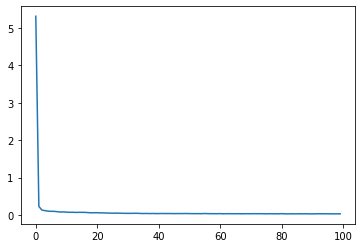

In [ ]:
plt.plot(retVAl.history['loss'])

In [ ]:
pred = Mymodel1.predict(featureVectorTest)
pred = pred * 1000
pred

array([[133665.81],
       [154524.2 ],
       [180766.02],
       ...,
       [162291.88],
       [106507.25],
       [270759.4 ]], dtype=float32)

In [ ]:
pred = pred.flatten()

In [ ]:
id = testDataFrame.Id

In [ ]:
id = np.array(id)
id

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [ ]:
df = {
    'Id' : id,
    'SalePrice' : pred
}

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,Id,SalePrice
0,1461,133665.812500
1,1462,154524.203125
2,1463,180766.015625
3,1464,196062.625000
4,1465,190053.656250


In [ ]:
df.to_csv('notsonaivePrediction.csv')